In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
housing = pd.read_csv('Data/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'],sep=',')
housing.head()
print(housing.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing[['longitude','latitude','median_house_value']], housing[['median_house_value']], test_size=0.1, random_state=0)

from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train, axis=0)
X_test_norm = preprocessing.normalize(X_test, axis=0)

print('X_train_norm',len(X_train_norm))

from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans1.fit(X_train[['latitude']])
labels1=kmeans1.predict(X_train[['latitude']])

kmeans2 = KMeans(n_clusters = 3, random_state = 0, n_init=3)
kmeans2.fit(X_train[['longitude']])
labels2=kmeans2.predict(X_train[['longitude']])

dflabels1=pd.DataFrame(labels1, columns=['class1'])
dflabels2=pd.DataFrame(labels2, columns=['class2'])

(20640, 3)
X_train_norm 18576


<Axes: ylabel='median_house_value'>

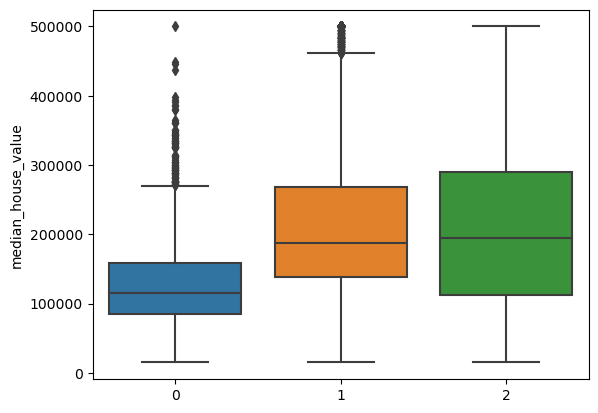

In [2]:
import seaborn as sns
sns.boxplot(x = labels1, y = y_train['median_house_value'])

In [3]:
#X_train=pd.concat([train_sp, X_train.reset_index(drop=True, inplace=True)], axis=1)
df=pd.concat([X_train.reset_index(), dflabels1.reset_index(), dflabels2], axis=1)
df
#sns.scatterplot(data = df, x = 'class', y='Price')
#df[['Price','class']]
#sns.boxplot(x = df['class'], y = df['Price'])

,index,longitude,latitude,median_house_value,index,class1,class2
0,2255,-119.83,36.80,80800.0,0,2,2
1,17341,-120.40,34.86,275000.0,1,1,2
2,11589,-118.03,33.78,257500.0,2,1,1
3,13635,-117.32,34.09,75300.0,3,1,1
4,693,-122.11,37.70,161400.0,4,2,0
...,...,...,...,...,...,...,...
18571,13123,-121.26,38.27,144600.0,18571,2,0
18572,19648,-120.89,37.48,159400.0,18572,2,2
18573,9845,-121.90,36.58,289300.0,18573,2,0
18574,10799,-117.93,33.62,484600.0,18574,1,1


In [4]:
k=max(df['class1'])+1
print('latitude')
for i in range(k):
    dfi=df['latitude'][df['class1']==i]
    print(f'{i+1},  {dfi.mean():.0f}')
print('longitude')
for i in range(k):
    dfi=df['longitude'][df['class2']==i]
    print(f'{i+1},  {dfi.mean():.0f}')

latitude
1,  39
2,  34
3,  37
longitude
1,  -122
2,  -118
3,  -120


In [5]:
#X_train
#df['class']
k=max(df['class1'])+1
print('Classes ij')
for i in range(k):
    for j in range(k):
        dfij=df['median_house_value'][(df['class1']==i) & (df['class2']==j)]
        print(f'{i+1}{j+1},  {dfij.mean():.0f}')

Classes ij
11,  130653
12,  nan
13,  125284
21,  280183
22,  218221
23,  203193
31,  249861
32,  99990
33,  90181


In [6]:
max(df['class1'])

2